# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from tabulate import tabulate
import seaborn as sns

# Agregamos un poco de formatting
pd.set_option('display.max_rows', 20)      # Display all rows
pd.set_option('display.max_columns', None) # Display all columns
pd.set_option('display.width', 500)        # Adjust display width


# Load IMDb dataset
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
print (f"\nOld df:\n")
# Agregamos un poco mas de formatting con tabulate
print(tabulate(df.head(10), headers="keys", tablefmt="psql"))


Old df:

+----+---------------+-----------------------------------------------+------------------+-----------+------------+-----------------------------------------------------------+
|    |   star_rating | title                                         | content_rating   | genre     |   duration | actors_list                                               |
|----+---------------+-----------------------------------------------+------------------+-----------+------------+-----------------------------------------------------------|
|  0 |           9.3 | The Shawshank Redemption                      | R                | Crime     |        142 | [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']        |
|  1 |           9.2 | The Godfather                                 | R                | Crime     |        175 | [u'Marlon Brando', u'Al Pacino', u'James Caan']           |
|  2 |           9.1 | The Godfather: Part II                        | R                | Crime     |        200 | 

In [63]:
# 1.1 Create a new column called 'title_length' with the length (number of characters) of each title

# 1.1.1 Para contar cuantos caracteres tiene cada titulo de peli primero hacemos esto.
# Tambien imprimimos los valores del conteo de caracteres

titleMovieLength = df["title"].str.len()
print (f"\nLength of each movie: \n {titleMovieLength}")

# 1.1.2. Adicionamos la columna justo despues de title con los valores de titleMovieLenght
#      Imprimimos el nuevo df

df.insert(loc=df.columns.get_loc("title")+1, column="title_length", value = titleMovieLength)
print (f"\nNew df:")
print(tabulate(df.head(10), headers="keys", tablefmt="psql"))


Length of each movie: 
 0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title, Length: 979, dtype: int64

New df:
+----+---------------+-----------------------------------------------+----------------+------------------+-----------+------------+-----------------------------------------------------------+
|    |   star_rating | title                                         |   title_length | content_rating   | genre     |   duration | actors_list                                               |
|----+---------------+-----------------------------------------------+----------------+------------------+-----------+------------+-----------------------------------------------------------|
|  0 |           9.3 | The Shawshank Redemption                      |             24 | R                | Crime     |        142 | [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']        |
|  1 |           9.2 | The Godfather             

In [64]:
# 1.2. Calculate mean, median, and mode of the 'title_length' column

# Aplicamos las funciones

mean_length = df["title_length"].mean()
median_length = df["title_length"].median()
mode_length = df["title_length"].mode()[0]  # el primer valor de la moda para que se vea mas agradable y no muestre el 0


print("La media de mi title_length es:", round(mean_length, 2)) # Redondeamos el valor pues da muchos decimales
print("La mediana de mi title_length es:", median_length)
print("La moda de mi title_length:", mode_length)

La media de mi title_length es: 15.48
La mediana de mi title_length es: 14.0
La moda de mi title_length: 12


In [65]:
# 1.3. Calculate the range, variance, and standard deviation of 'title_length'

range_length = df["title_length"].max() - df["title_length"].min()  # Rango (valores min y max)
variance_length = df["title_length"].var()                          # Varianza
std_length = df["title_length"].std(ddof=0)                         # Desviacion Standard

print("El rango es de mi columna title_length:", range_length)
print("La varianza es:", round(variance_length, 2))
print("La desviación estándar es:", round(std_length, 2))

El rango es de mi columna title_length: 67
La varianza es: 72.11
La desviación estándar es: 8.49


In [66]:
# 1.4. Calculate skewness and kurtosis of the 'title_length' column

skewness_length = skew(df["title_length"])
kurtosis_length = kurtosis(df["title_length"])

print("Mi Skewness:", round(skewness_length, 2))
print ("Explicacion Skewness: positivo alto. Es asimetrica a la derecha")

print("\nMi Kurtosis:", round(kurtosis_length, 2))
print ("Explicacion Kurtosis: distribución tiene colas relativamente “pesadas” y un pico más alto")

Mi Skewness: 1.52
Explicacion Skewness: positivo alto. Es asimetrica a la derecha

Mi Kurtosis: 3.79
Explicacion Kurtosis: distribución tiene colas relativamente “pesadas” y un pico más alto


In [67]:
# 1.5. Print the shortest and longest title based on their length

shortest_title = df.loc[df["title_length"].idxmin(), "title"]
longest_title = df.loc[df["title_length"].idxmax(), "title"]

print("El título más corto es:", shortest_title)
print("El título más largo es:", longest_title)

print("Nota de Onofre: Me encanta Fritz Lang. Su fanático de Metropolis")

El título más corto es: M
El título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Nota de Onofre: Me encanta Fritz Lang. Su fanático de Metropolis


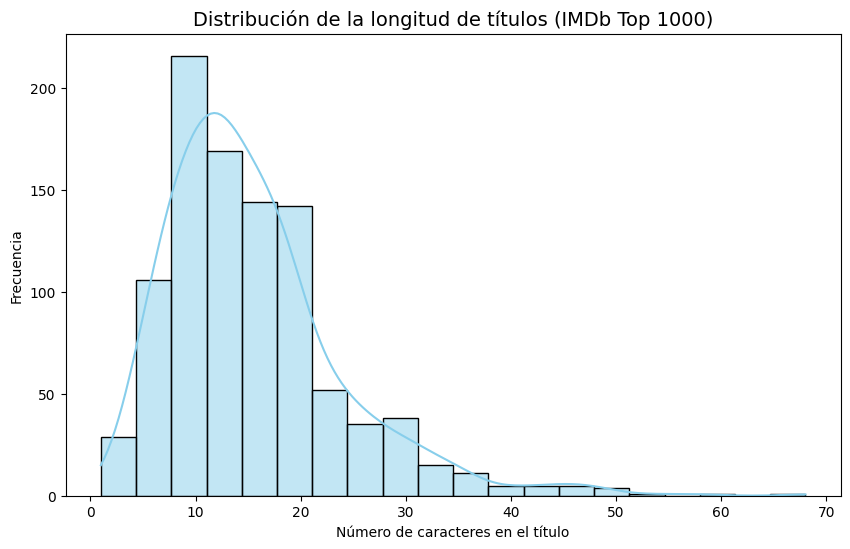

In [68]:
# 1.6. Plot your results

# Hacemos Histograma + curva de densidad
plt.figure(figsize=(10,6))
sns.histplot(df["title_length"], bins=20, kde=True, color="skyblue")

plt.title("Distribución de la longitud de títulos (IMDb Top 1000)", fontsize=14)
plt.xlabel("Número de caracteres en el título")
plt.ylabel("Frecuencia")
plt.show()

---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [77]:
# 2.1. Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]

# Usamos los 5 valores reales del (df):
# Extraemos titulo y el length
sample = df[["title","title_length"]].sample(5, random_state=1)

# Mostrar los 5 títulos seleccionados en formato tabla
print(tabulate(sample, headers="keys", tablefmt="psql"))


+-----+-------------------------------------------+----------------+
|     | title                                     |   title_length |
|-----+-------------------------------------------+----------------|
| 671 | Grindhouse                                |             10 |
| 726 | Sherlock Holmes                           |             15 |
| 932 | Harry Potter and the Order of the Phoenix |             41 |
|   6 | The Good, the Bad and the Ugly            |             30 |
| 954 | X-Men                                     |              5 |
+-----+-------------------------------------------+----------------+


In [79]:
# 2.2. Calculate the mean of the 5 values

mean_sample = sample["title_length"].mean()
print("La media de los 5 títulos es:", round(mean_sample, 2))


La media de los 5 títulos es: 20.2


In [86]:
# 2.3. Calculate the squared differences with respect to the mean

squared_diffs = (sample["title_length"] - mean_sample) ** 2
print("Diferencias al cuadrado:\n", [round(x, 2) for x in squared_diffs.tolist()]) # redondeamos cada valor de la lista con for x

# Visualicemos!
result = sample.copy()
result["squared_diff"] = squared_diffs

print(tabulate(result, headers="keys", tablefmt="psql"))


Diferencias al cuadrado:
 [104.04, 27.04, 432.64, 96.04, 231.04]
+-----+-------------------------------------------+----------------+----------------+
|     | title                                     |   title_length |   squared_diff |
|-----+-------------------------------------------+----------------+----------------|
| 671 | Grindhouse                                |             10 |         104.04 |
| 726 | Sherlock Holmes                           |             15 |          27.04 |
| 932 | Harry Potter and the Order of the Phoenix |             41 |         432.64 |
|   6 | The Good, the Bad and the Ugly            |             30 |          96.04 |
| 954 | X-Men                                     |              5 |         231.04 |
+-----+-------------------------------------------+----------------+----------------+


In [87]:
# 2.4. Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation

variance_manual = sum(squared_diffs) / len(squared_diffs)
std_manual = variance_manual ** 0.5

print("Varianza manual:", round(variance_manual, 2))
print("Desviación estándar manual:", round(std_manual, 2))

Varianza manual: 178.16
Desviación estándar manual: 13.35
